# House price prediction based on area , bed rooms , years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [34]:
# To load the dataset

file = pd.read_csv("home_price.csv")
file

,AREA,BED ROOMS,YEARS,PRICE
0,100,1,4,7456892
1,120,2,10,1478526
2,200,4,25,3698745
3,170,7,16,1478563
4,150,6,18,4563987
5,230,4,19,4712581
6,225,5,23,1112475
7,300,3,24,4444658
8,330,4,25,9993254
9,360,8,29,1574453


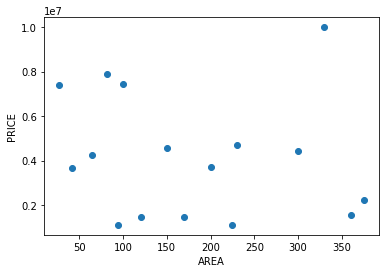

In [29]:
# Comparing Area and Price

area = file['AREA'].values
price = file['PRICE'].values
plt.xlabel("AREA")
plt.ylabel("PRICE")
plt.scatter(area , price)

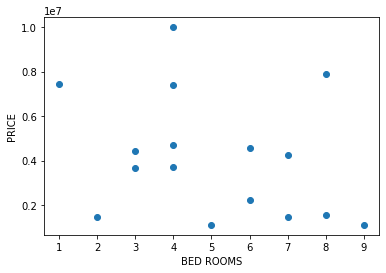

In [32]:
# Comparing Bed Rooms and Price

bed_rooms = file['BED ROOMS'].values
price = file['PRICE'].values
plt.xlabel("BED ROOMS")
plt.ylabel("PRICE")
plt.scatter(bed_rooms , price)

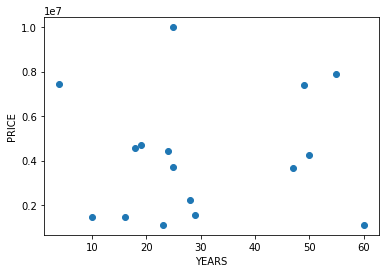

In [33]:
# Comparing years and Price

years = file['YEARS'].values
price = file['PRICE'].values
plt.xlabel("YEARS")
plt.ylabel("PRICE")
plt.scatter(years , price)

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AREA       16 non-null     int64
 1   BED ROOMS  16 non-null     int64
 2   YEARS      16 non-null     int64
 3   PRICE      16 non-null     int64
dtypes: int64(4)
memory usage: 640.0 bytes


In [4]:
file.columns

Index(['AREA', 'BED ROOMS', 'YEARS', 'PRICE'], dtype='object')

In [5]:
file.describe()

,AREA,BED ROOMS,YEARS,PRICE
count,16.000000,16.000000,16.000000,1.600000e+01
mean,179.312500,5.062500,30.125000,4.195451e+06
std,114.353673,2.322893,16.835973,2.753005e+06
min,27.000000,1.000000,4.000000,1.112475e+06
25%,91.000000,3.750000,18.750000,1.550480e+06
50%,160.000000,4.500000,25.000000,3.986922e+06
75%,247.500000,7.000000,47.500000,5.386936e+06
max,375.000000,9.000000,60.000000,9.993254e+06


In [6]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

In [50]:
from sklearn.model_selection import train_test_split

x = file[['AREA' , 'BED ROOMS' , 'YEARS']]
y = file['PRICE']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.10 , random_state = 10)
regression.fit(x_train , y_train)      #Training the model.

LinearRegression()

In [51]:
x_test

,AREA,BED ROOMS,YEARS
5,230,4,19
3,170,7,16


In [52]:
y_test

5    4712581
3    1478563
Name: PRICE, dtype: int64

In [53]:
regression.coef_

array([    687.19566092, -581390.4572553 ,   58486.39170209])

In [54]:
regression.intercept_

5270949.916443687

In [55]:
regression.predict(x_test)

array([4214684.53177496, 2253822.24524731])

In [56]:
regression.score(x_test , y_test)

0.8376636111483555

array([[<AxesSubplot:xlabel='AREA', ylabel='AREA'>,
        <AxesSubplot:xlabel='BED ROOMS', ylabel='AREA'>,
        <AxesSubplot:xlabel='YEARS', ylabel='AREA'>],
       [<AxesSubplot:xlabel='AREA', ylabel='BED ROOMS'>,
        <AxesSubplot:xlabel='BED ROOMS', ylabel='BED ROOMS'>,
        <AxesSubplot:xlabel='YEARS', ylabel='BED ROOMS'>],
       [<AxesSubplot:xlabel='AREA', ylabel='YEARS'>,
        <AxesSubplot:xlabel='BED ROOMS', ylabel='YEARS'>,
        <AxesSubplot:xlabel='YEARS', ylabel='YEARS'>]], dtype=object)

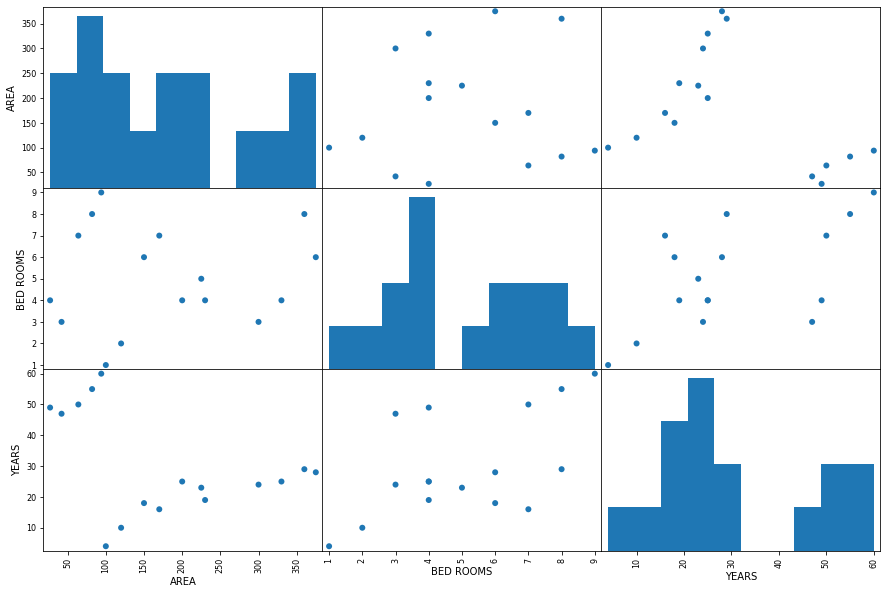

In [57]:
features = ['AREA' , 'BED ROOMS' , 'YEARS']
pd.plotting.scatter_matrix(file[features] , figsize = (15 , 10) , marker='o' , alpha = 1)

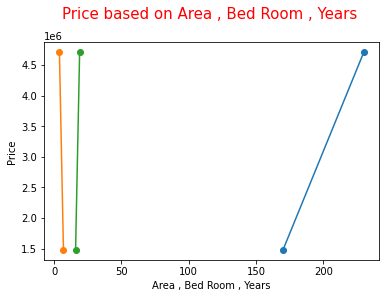

In [58]:
plt.xlabel("Area , Bed Room , Years")
plt.ylabel("Price")
plt.title("Price based on Area , Bed Room , Years \n" , color="red" , size=15)
plt.plot(x_test , y_test , marker="o")